In [ ]:
import pandas as pd
from flair.models import TextClassifier
from flair.data import Sentence
import seaborn as sns
import numpy as np
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
% matplotlib inline

UsageError: Line magic function `%` not found.


In [ ]:
df_sentiments = pd.read_pickle('data/climate_df_sentiments_2018.pkl')

##### Mapping the sentiment score. Negative sentiments are mapped to negative floating point numbers, positive sentiments to positive ones. This allows to take the mean of the sentiment over a certain amount of time

In [ ]:
df_sentiments['sentiment_score'] = df_sentiments.sentiment.apply(lambda x: float(str(x)[11:-2]) if str(x)[1] == 'P' else -float(str(x)[11:-2]))

In [ ]:
df_sentiments['date'] = df_sentiments.quoteID.str.slice(stop=10)

In [ ]:
sentiment_daily = df_sentiments.groupby('date')['sentiment_score'].mean()

##### Plotting the number of quotes per month

<AxesSubplot:xlabel='month'>

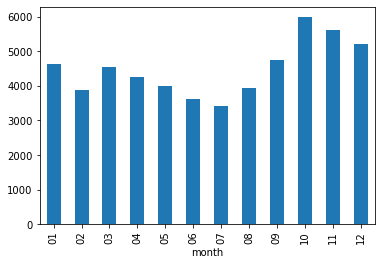

In [ ]:
df_sentiments.groupby('month')['quoteID'].count().plot(kind='bar')

In [ ]:
text = "".join(quote for quote in df_sentiments.quotation)
print ("There are {} words in the combination of all quotes.".format(len(text)))

There are 11082351 words in the combination of all quotes.


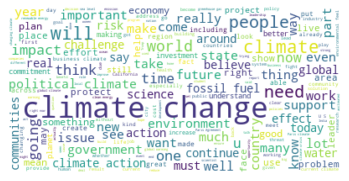

In [ ]:
wordcloud = WordCloud( background_color="white").generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
df_sentiments['month'] = df_sentiments.quoteID.str.slice(start= 5, stop=7)

In [ ]:
sentiment_monthly = df_sentiments.groupby('month')['sentiment_score'].mean()

<AxesSubplot:xlabel='month'>

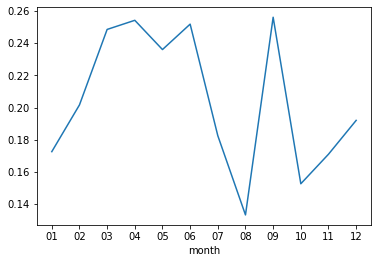

In [ ]:
sns.lineplot(data=sentiment_monthly , x=sentiment_monthly.index, y=sentiment_monthly.values)

## Extracting Greta Thunberg's quotes


In [ ]:
df_greta = df_sentiments[df_sentiments.speaker.str.contains('greta thunberg', na=False, case=False)]

In [ ]:
len(df_greta)

28

In [ ]:
sentiment_monthly_greta = df_greta.groupby('month')['sentiment_score'].mean()

<AxesSubplot:xlabel='month'>

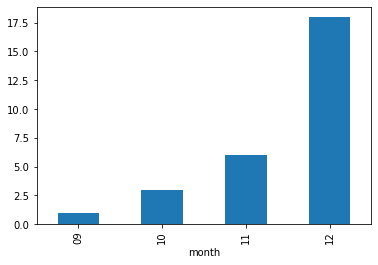

In [ ]:
df_greta.groupby('month')['quoteID'].count().plot(kind='bar')

##### Here we can see when Greta Thunberg started to take off as a public figure

<AxesSubplot:xlabel='month'>

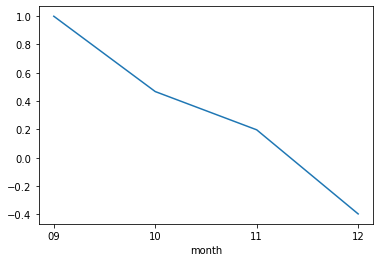

In [ ]:
sns.lineplot(data=sentiment_monthly_greta , x=sentiment_monthly_greta.index, y=sentiment_monthly_greta.values)

In [ ]:
text = "".join(quote for quote in df_greta.quotation)
print ("There are {} words in the combination of all quotes.".format(len(text)))

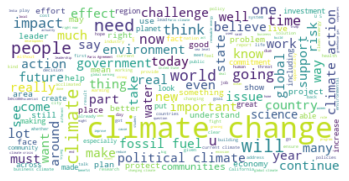

In [ ]:
wordcloud = WordCloud( background_color="white").generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### Focusing on Trump quotes in the year 2018

In [ ]:
df_trump = df_sentiments[df_sentiments.speaker.str.contains('donald trump', na=False, case=False)]

In [ ]:
len(df_trump)

222

In [ ]:
sentiment_monthly_trump = df_trump.groupby('month')['sentiment_score'].mean()

<AxesSubplot:xlabel='month'>

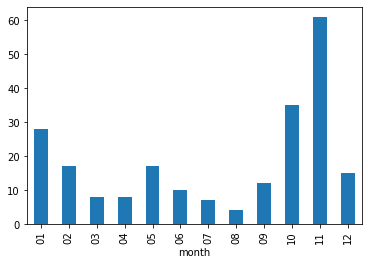

In [ ]:
df_trump.groupby('month')['quoteID'].count().plot(kind='bar')

<AxesSubplot:xlabel='month'>

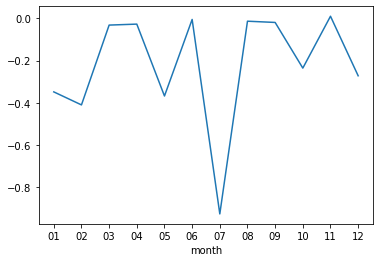

In [ ]:
sns.lineplot(data=sentiment_monthly_trump , x=sentiment_monthly_trump.index, y=sentiment_monthly_trump.values)

In [ ]:
text = "".join(quote for quote in df_trump.quotation)
print ("There are {} words in the combination of all quotes.".format(len(text)))

There are 34809 words in the combination of all quotes.


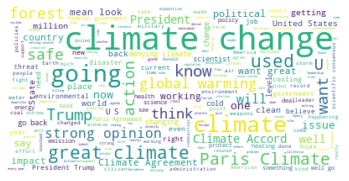

In [ ]:
wordcloud = WordCloud( background_color="white").generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()